In [20]:
#start analysis of naloxone data
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#plot for Naloxone administrations and number of survivals
#start with summing naloxone administrations

naloxone2018 = pd.read_csv("clean data/naloxone_by_county.csv")
naloxone2018.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18
0,Allegheny,15,13,37,56,58,81,79,63,72,44,69,54
1,Beaver,1,2,5,4,1,7,6,9,1,6,5,5
2,Berks,5,0,7,7,10,5,10,7,10,6,8,8
3,Bucks,16,13,19,43,63,39,58,62,70,55,55,48
4,Cambria,1,2,7,10,13,7,2,12,12,7,7,4


In [3]:
#add summary column for year
naloxone2018["Total"]= naloxone2018.sum(axis=1)
naloxone2018.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18,Total
0,Allegheny,15,13,37,56,58,81,79,63,72,44,69,54,641
1,Beaver,1,2,5,4,1,7,6,9,1,6,5,5,52
2,Berks,5,0,7,7,10,5,10,7,10,6,8,8,83
3,Bucks,16,13,19,43,63,39,58,62,70,55,55,48,541
4,Cambria,1,2,7,10,13,7,2,12,12,7,7,4,84


In [4]:
#summarize months
naloxone_months = naloxone2018.sum(axis=0, skipna = True)
naloxone_months = naloxone_months.drop(labels=["County"])
naloxone_months = pd.DataFrame(naloxone_months)
naloxone_months = naloxone_months.rename(columns={0: "Naloxone_Admin"})
naloxone_months

,Naloxone_Admin
Jan18,184
Feb18,160
Mar18,330
Apr18,390
May18,430
Jun18,436
Jul18,448
Aug18,397
Sep18,422
Oct18,332


In [5]:
#now do same for survival
survival2018 = pd.read_csv("clean data/survival_numbers_after_naloxone.csv")
survival2018["Total"]=survival2018.sum(axis=1)
survival2018.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18,Total
0,Allegheny,15,13,37,56,58,81,79,63,72,44,69,54,641
1,Beaver,1,2,5,4,1,7,6,9,1,6,5,5,52
2,Bucks,16,13,19,43,63,39,58,62,70,55,55,48,541
3,Cambria,1,2,7,10,13,7,2,12,12,7,7,4,84
4,Chester,1,2,26,24,41,35,23,20,27,17,14,29,259


In [6]:
#summarize survival by months
survival_months = survival2018.sum(axis=0, skipna = True)
survival_months = survival_months.drop(labels=["County"])
survival_months = pd.DataFrame(survival_months)
survival_months = survival_months.rename(columns={0: "Survival"})
survival_months

,Survival
Jan18,168
Feb18,154
Mar18,313
Apr18,363
May18,410
Jun18,404
Jul18,426
Aug18,372
Sep18,392
Oct18,322


In [7]:
#merge dataframes and calculate survival rate
nal_and_survive = naloxone_months.join(survival_months, how="outer")
nal_and_survive = nal_and_survive.reindex(["Jan18", "Feb18", "Mar18", "Apr18", "May18",
                                          "Jun18", "Jul18", "Aug18", "Sep18", "Oct18", "Nov18",
                                          "Dec18"])
nal_and_survive

,Naloxone_Admin,Survival
Jan18,184,168
Feb18,160,154
Mar18,330,313
Apr18,390,363
May18,430,410
Jun18,436,404
Jul18,448,426
Aug18,397,372
Sep18,422,392
Oct18,332,322


In [8]:
#add rate column
nal_and_survive["rate"] = nal_and_survive["Survival"]/nal_and_survive["Naloxone_Admin"]*100
nal_and_survive

,Naloxone_Admin,Survival,rate
Jan18,184,168,91.3043
Feb18,160,154,96.25
Mar18,330,313,94.8485
Apr18,390,363,93.0769
May18,430,410,95.3488
Jun18,436,404,92.6606
Jul18,448,426,95.0893
Aug18,397,372,93.7028
Sep18,422,392,92.891
Oct18,332,322,96.988


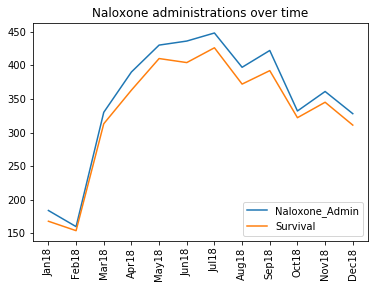

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(nal_and_survive["Naloxone_Admin"])
plt.plot(nal_and_survive["Survival"])
plt.xticks(rotation="vertical")
plt.title("Naloxone administrations over time")
plt.legend()
plt.show()
plt.savefig("naloxone_admin_over_time")

In [14]:
#chi square analysis for naloxone administrations per county

#set up df to get observed values
chi_square1 = naloxone2018.reset_index()
chi_square1 = chi_square1[["County", "Total"]]
chi_square1 = chi_square1.set_index("County")
chi_square1

,Total
County,
Allegheny,641
Beaver,52
Berks,83
Bucks,541
Cambria,84
Carbon,52
Centre,33
Chester,259
Cumberland,50


In [19]:
#now add expected value column
expected = chi_square1["Total"].mean()
chi_square1["expected"] = expected
chi_square1

#get degree of freedom
freedom = chi_square1["expected"].count() - 1
freedom

23

In [21]:
#get critical value
critical_value = stats.chi2.ppf(q=0.95, df = 23)
critical_value

35.17246162690806

In [22]:
#run chi square test
stats.chisquare(chi_square1["Total"], chi_square1["expected"])

Power_divergenceResult(statistic=4501.146514935988, pvalue=0.0)

In [38]:
#absolutely significant differences re: counties
#graph county naloxone admin and survival
compare = naloxone2018[["County", "Total"]]
compare2 = survival2018[["County", "Total"]]

comparison = pd.merge(compare, compare2, on="County", how="outer")
comparison = comparison.rename(columns={"Total_x": "Num_Naloxone", "Total_y": "Num_Survived"})
comparison = comparison.fillna(value=0)
comparison

,County,Num_Naloxone,Num_Survived
0,Allegheny,641,641.0
1,Beaver,52,52.0
2,Berks,83,0.0
3,Bucks,541,541.0
4,Cambria,84,84.0
5,Carbon,52,0.0
6,Centre,33,0.0
7,Chester,259,259.0
8,Cumberland,50,50.0
9,Dauphin,140,140.0


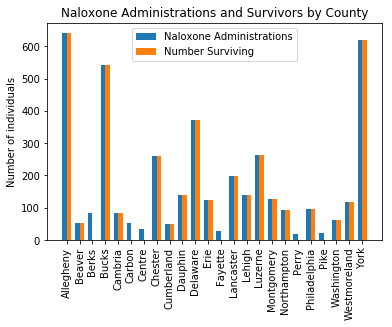

<Figure size 432x288 with 0 Axes>

In [40]:
#create grouped bar chart
labels = comparison["County"]
naloxone = comparison["Num_Naloxone"]
survival = comparison["Num_Survived"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, naloxone, width, label = "Naloxone Administrations")
rects2 = ax.bar(x+width/2, survival, width, label = "Number Surviving")
ax.set_ylabel("Number of individuals")
ax.set_title("Naloxone Administrations and Survivors by County")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = "vertical")
ax.legend()

plt.show()
plt.savefig("naloxone_admin_by_county")